In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import *
from sklearn.naive_bayes import MultinomialNB,GaussianNB ,BernoulliNB, ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
import seaborn as sns

In [4]:
data = pd.read_csv('heart_2020_cleaned.csv')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,Male,60-64,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,Male,35-39,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,Female,45-49,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,Female,25-29,Hispanic,0,0,Good,12,0,0,0


In [5]:
df = pd.DataFrame(data)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,Male,60-64,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,Male,35-39,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,Female,45-49,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,Female,25-29,Hispanic,0,0,Good,12,0,0,0


In [6]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.775362,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.417344,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000


In [7]:
df2 = df.dropna()

In [8]:
# prof = ProfileReport(df2)
# prof.to_file(output_file='output.html')
#this pandas profilng was better

In [9]:
# my_report = sv.analyze(df2)
# my_report.show_html()

In [10]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,Male,60-64,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,Male,35-39,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,Female,45-49,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,Female,25-29,Hispanic,0,0,Good,12,0,0,0


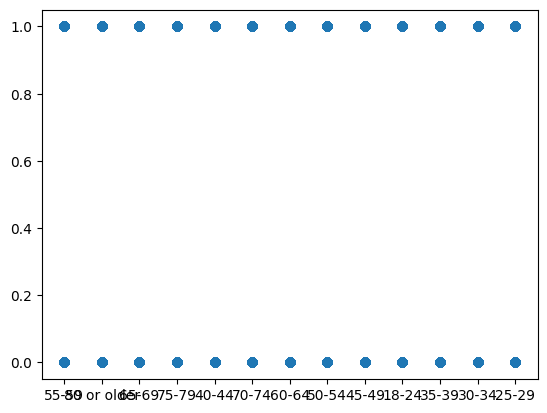

In [11]:
plt.scatter(df['AgeCategory'],df['HeartDisease'])

In [12]:
# pd.plotting.scatter_matrix(df, alpha=0.3,diagonal='kde' )
# plt.tight_layout() # To avoid overlapping of plots
# sns.set_style("whitegrid")
# sns.pairplot(df, hue="species")
# plt.show()

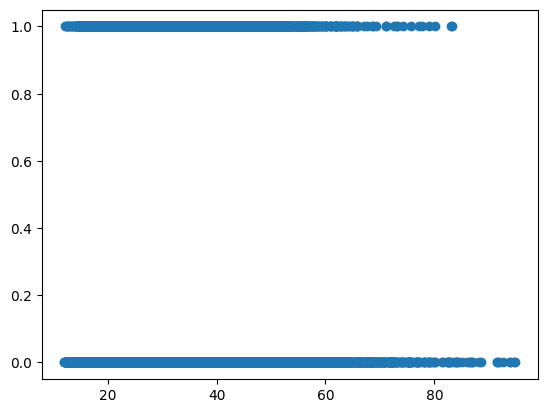

In [13]:
plt.scatter(df['BMI'],df['HeartDisease'])

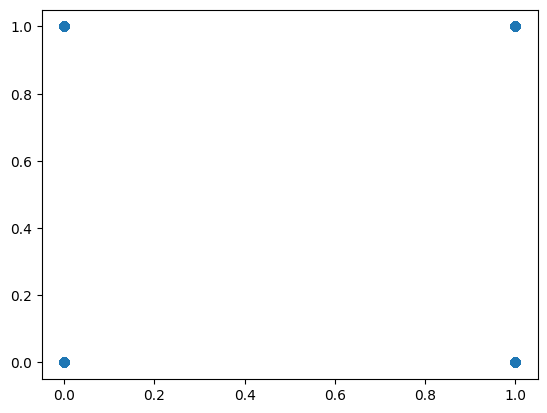

In [14]:
plt.scatter(df['Smoking'],df['HeartDisease'])

In [15]:
df['BMI'].nlargest(500)

126896    94.85
242834    94.66
104267    93.97
249715    93.86
156093    92.53
          ...  
107381    59.96
36391     59.91
77722     59.91
187406    59.91
228089    59.91
Name: BMI, Length: 500, dtype: float64

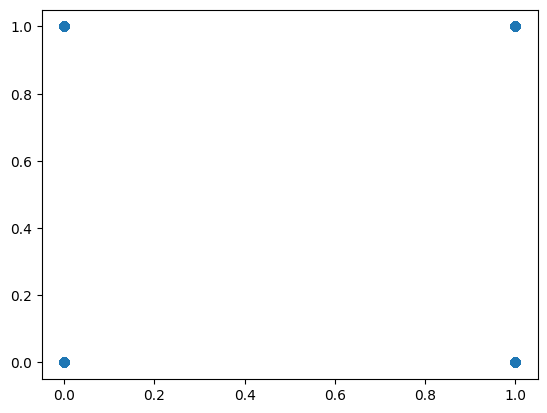

In [16]:
#i think bmi above 60 are noisy values 
df2 = df[df['BMI']<60]
plt.scatter(df['Smoking'],df['HeartDisease'])


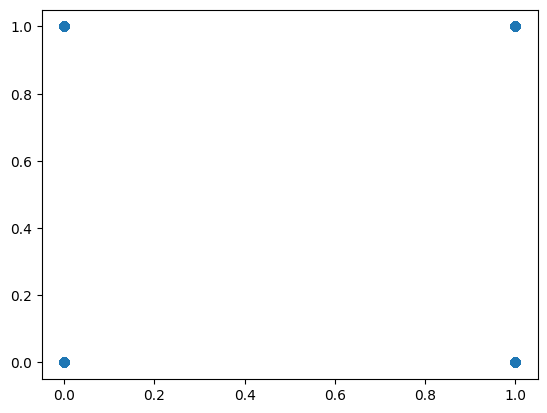

In [17]:
plt.scatter(df['AlcoholDrinking'],df['HeartDisease'])

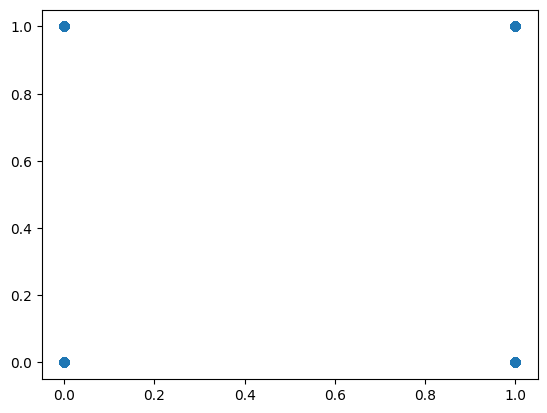

In [18]:
plt.scatter(df['Stroke'],df['HeartDisease'])

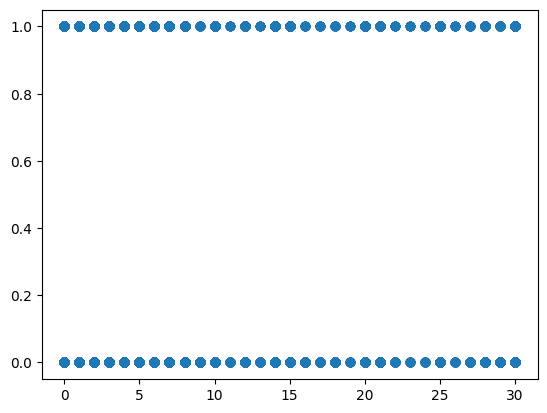

In [19]:
plt.scatter(df2['PhysicalHealth'],df2['HeartDisease'])

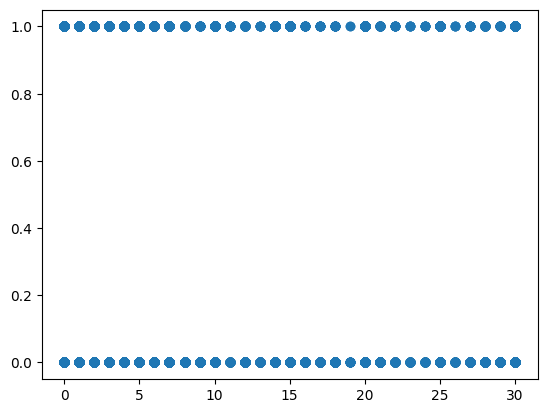

In [20]:
plt.scatter(df2['MentalHealth'],df2['HeartDisease'])

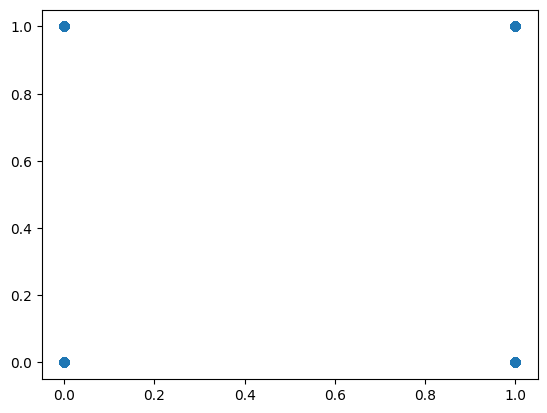

In [21]:
plt.scatter(df2['DiffWalking'],df2['HeartDisease'])

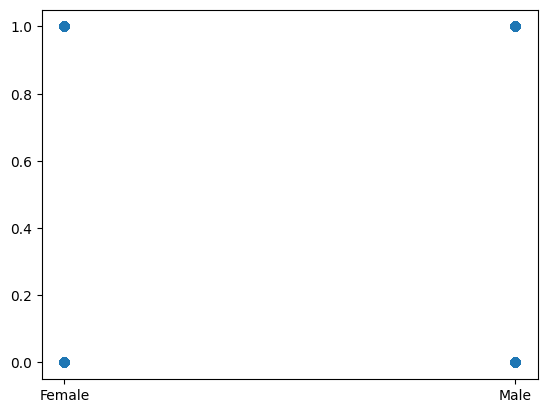

In [22]:
plt.scatter(df2['Sex'],df2['HeartDisease'])

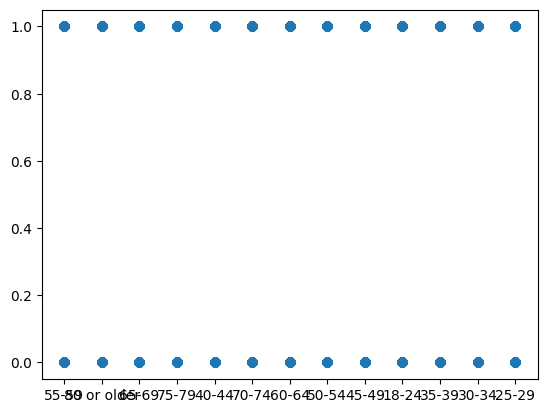

In [23]:
plt.scatter(df2['AgeCategory'],df2['HeartDisease'])

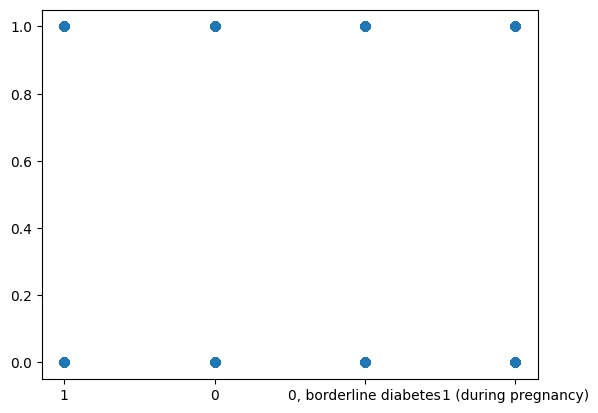

In [24]:
plt.scatter(df2['Diabetic'],df2['HeartDisease'])

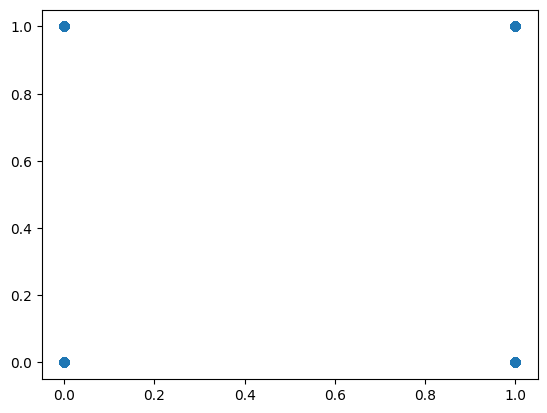

In [25]:
plt.scatter(df2['PhysicalActivity'],df2['HeartDisease'])

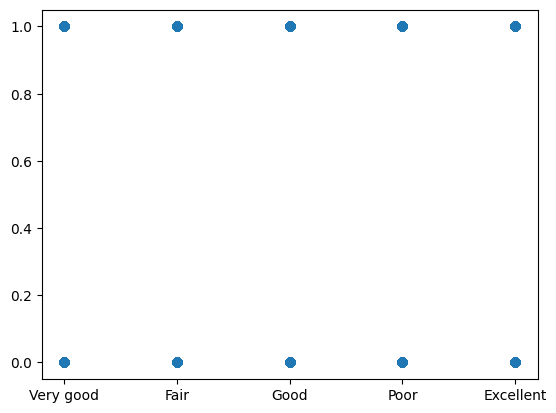

In [26]:
plt.scatter(df2['GenHealth'],df2['HeartDisease'])

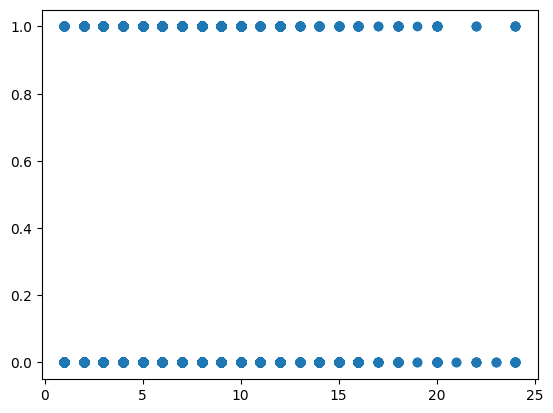

In [27]:
plt.scatter(df2['SleepTime'],df2['HeartDisease'])

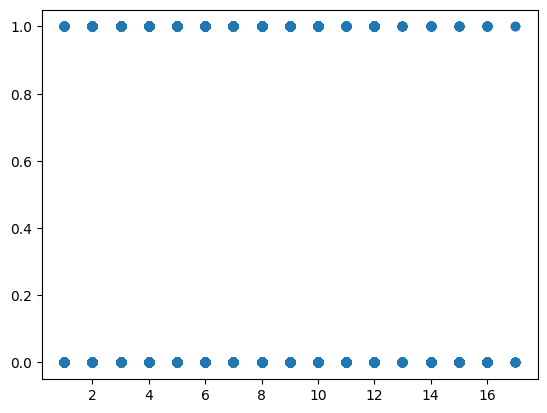

In [28]:
#25hours sleeeeeeeeeeeeep?realy?are u serious?ofc it's noisy value if more than 18
df2 = df2[df2['SleepTime']<18]
plt.scatter(df2['SleepTime'],df2['HeartDisease'])

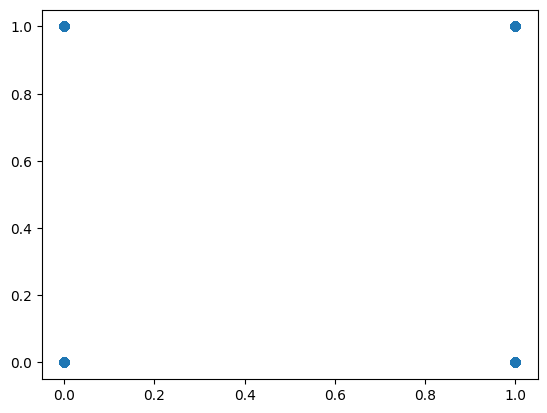

In [29]:
plt.scatter(df2['Asthma'],df2['HeartDisease'])

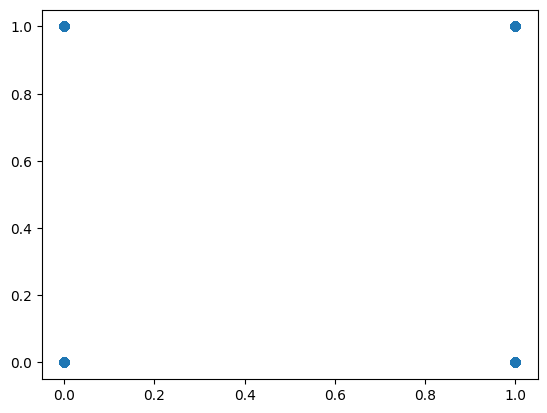

In [30]:
plt.scatter(df2['KidneyDisease'],df2['HeartDisease'])

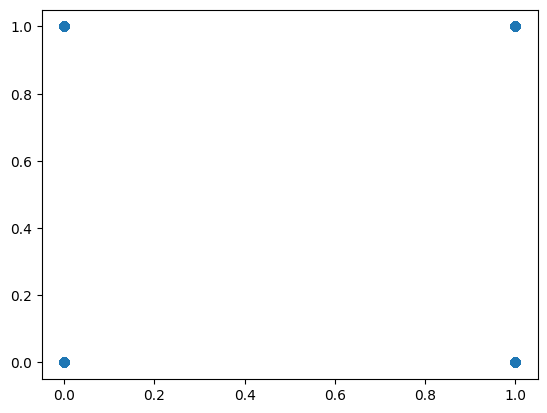

In [31]:
plt.scatter(df2['SkinCancer'],df2['HeartDisease'])

In [32]:
#hmmmmmmmmm our data is cleaned we can build our ML model

In [33]:
df2.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000,319094.000000
mean,0.085464,28.264665,0.412430,0.068112,0.037622,3.356397,3.887554,0.138025,0.776003,7.089246,0.133757,0.036685,0.093333
std,0.279571,6.167369,0.492273,0.251938,0.190281,7.931008,7.941151,0.344927,0.416921,1.397038,0.340391,0.187988,0.290899
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.380000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,59.970000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000


In [34]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,Male,60-64,Hispanic,1,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,Male,35-39,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,Female,45-49,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,Female,25-29,Hispanic,0,0,Good,12,0,0,0


In [35]:
df2 = df2.replace({'Sex': {'Male': 1, 'Female': 0}})
df2 = df2.replace({'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,'55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}})
df2 = df2.replace({'GenHealth': {'Fair': 0, 'Poor': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}})
df2 = df2.replace({'1': 1, '0': 0, '0, borderline diabetes':0, '1 (during pregnancy)':1})
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,White,1,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,White,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,White,1,1,0,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,White,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,White,0,1,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,Hispanic,1,0,0,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,Hispanic,0,1,3,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,Hispanic,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,Hispanic,0,0,2,12,0,0,0


In [36]:
x=pd.DataFrame(df2,columns=['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth','DiffWalking','Sex','AgeCategory','PhysicalActivity','GenHealth','SleepTime','Asthma','KidneyDisease','SkinCancer','Diabetic']).values
y= pd.DataFrame(df2,columns=['HeartDisease']).values
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [37]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [38]:
print(model.score(X_test, y_test))

0.9115210646721474


In [39]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9080529411150227


In [40]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9002287708009067


In [41]:
# parameters = {'kernel':('classifier', 'rbf'), 'C':[1, 50]}
# svc = svm.SVC()
# GridSearchCV(svc, parameters)
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_test, y_test)
         

In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(dt_model.score(X_test, y_test))
# #tree.plot_tree(dt_model)
# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(dt_model)

0.8657877968013873


In [44]:
# person = pd.DataFrame(58,1,1,1,15,1,0,0,3,0,1,2,11,1,0,0)
y_pred = dt_model.predict([[25,1,0,0,15,1,0,0,3,0,1,2,11,1,0,1]])
y_pred

array([0], dtype=int64)

In [45]:
nb_model =  MultinomialNB()
nb_model.fit(X_train, y_train)
print(nb_model.score(X_test, y_test))

0.8412706703297851


c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
nb_model =  GaussianNB()
nb_model.fit(X_train, y_train)
print(nb_model.score(X_test, y_test))

0.8425033166543053


c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
nb_model =  BernoulliNB()
nb_model.fit(X_train, y_train)
print(nb_model.score(X_test, y_test))

0.8933969852395826


c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
nb_model =  ComplementNB()
nb_model.fit(X_train, y_train)
print(nb_model.score(X_test, y_test))

0.8204096982105736


c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
print(lg_model.score(X_test, y_test))

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9163367422620105


c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
for i in range(20):    
    rf_model = RandomForestClassifier(max_depth=i+1, random_state=0)
    rf_model.fit(X_train, y_train)
    print(rf_model.score(X_test, y_test))

C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9154906036833144


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9154906036833144


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9154906036833144


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9156264037021175


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9159920191373565


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9162218345537925


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9163889730384732


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9166396807654943


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9167336961631272


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9167754807842974


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9164725422808135


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9165456653678613


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9164829884361061


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9164725422808135


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9160024652926491


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.915981572982064


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.915981572982064


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9158039883420906


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9157830960315057


C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\1811117055.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9151145420927828


In [51]:
rf_model = RandomForestClassifier(max_depth=7, random_state=0)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test, y_test))

C:\Users\Laptop Markazi\AppData\Local\Temp\ipykernel_26420\4241376403.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.9163889730384732


In [52]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9154906036833144
